# 準備

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn 
import pandas as pd

In [12]:
import pandas as pd
df=pd.read_csv('/Users/user/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [71]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [75]:
X = df[['GrLivArea', 'YearBuilt']]
y  = df.SalePrice

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lir = LinearRegression()
lir.fit(X_train, y_train)
predict_lir = lir.predict(X_test)
print(' LinearRegression')
print(y_test)
print('X_trainは{}'.format(X_train.shape))
print('X_testは{}'.format(X_test.shape))
print('y_trainは{}'.format(y_train.shape))
print('y_testは{}'.format(y_test.shape))
print('mean_squared_error = {}'.format(mean_squared_error(y_test, predict_lir)))

print('coefficient = ', lir.coef_) # 説明変数の係数を出力
print('intercept = ', lir.intercept_) # 切片を出力


 LinearRegression
892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
988     195000
243     120000
1342    228500
1057    248000
1418    124000
Name: SalePrice, Length: 365, dtype: int64
X_trainは(1095, 2)
X_testは(365, 2)
y_trainは(1095,)
y_testは(365,)
mean_squared_error = 2314465092.732014
coefficient =  [  92.19202992 1056.00826855]
intercept =  -2040959.5078146087


Text(0.5, 0, 'SalePrice')

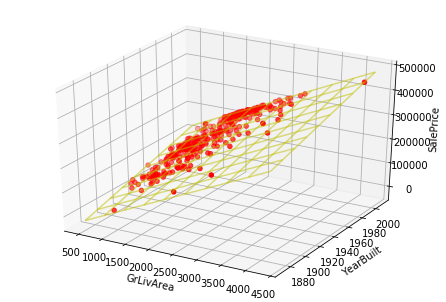

In [20]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)

X1 = np.linspace(470, 4316, 10)                             # x軸を作成
X2 = np.linspace(1870, 2009, 10)                             # y軸を作成
X, Y = np.meshgrid(X1, X2)                             # x軸とy軸からグリッドデータを作成
reg_wn = lir.coef_                       # 偏回帰係数
reg_w0 = lir.intercept_                  # 切片
Z = reg_w0 + (reg_wn[0] * X) + (reg_wn[1] * Y)   # 回帰平面のz値を作成
ax.plot_wireframe(X, Y, Z, label='Regression plane', alpha = 0.5, color = 'y')

ax.scatter3D(X_test.GrLivArea, X_test.YearBuilt, predict_lir, color = 'r')
ax.set_xlabel("GrLivArea")
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

# h_angle = 30
# v_angle = 30
# ax.view_init(v_angle, h_angle)

# rotate the axes and update
# for angle in range(0, 360,60):
# #     ax.view_init(30, angle)
# #     plt.draw()
# #     plt.pause(5)


## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。  
線形回帰
  
  SVM  
  決定木
  
  ランダムフォレスト  
  公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

##  各手法による学習・推定・評価  
### 線形回帰
### SVM
### 決定木
### ランダムフォレスト

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# 線形回帰
lir = LinearRegression()
lir.fit(X_train, y_train)
predict_lir = lir.predict(X_test)
print('LinearRegression')
print('mean_squared_error = {}'.format(mean_squared_error(y_test, predict_lir)))
print('')
# SVM
svr = SVR()
svr.fit(X_train, y_train)
predict_svr = svr.predict(X_test)
print('SVR')
print('mean_squared_error = {}'.format(mean_squared_error(y_test, predict_svr)))
print('')
# 決定木
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predict_dtr = dtr.predict(X_test)
print('DecisionTreeRegressor')
print('mean_squared_error = {}'.format(mean_squared_error(y_test, predict_dtr)))
print('')
# ランダムフォレスト¶
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predict_rfr = rfr.predict(X_test)
print('RandomForestRegressor')
print('mean_squared_error = {}'.format(mean_squared_error(y_test, predict_rfr)))


LinearRegression
mean_squared_error = 2314465092.732014

SVR
mean_squared_error = 7188819734.040301

DecisionTreeRegressor
mean_squared_error = 2388786073.0194826

RandomForestRegressor
mean_squared_error = 1842414288.8016374


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
X_test.shape

(365, 2)

In [25]:
X_test.GrLivArea

892     1068
1105    2622
413     1028
522     1664
1036    1620
        ... 
988     2030
243     1217
1342    2169
1057    1850
1418    1144
Name: GrLivArea, Length: 365, dtype: int64

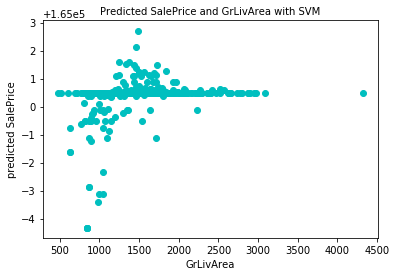

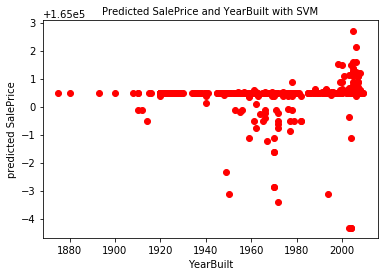

In [39]:
plt.title('Predicted SalePrice and GrLivArea with SVM', size = 10)
plt.scatter(X_test.GrLivArea, predict_svr , c='c')
plt.xlabel('GrLivArea')
plt.ylabel('predicted SalePrice')
plt.show()

plt.title('Predicted SalePrice and YearBuilt with SVM', size = 10)
plt.scatter(X_test.YearBuilt, predict_svr , c='r')
plt.xlabel('YearBuilt')
plt.ylabel('predicted SalePrice')
plt.show()

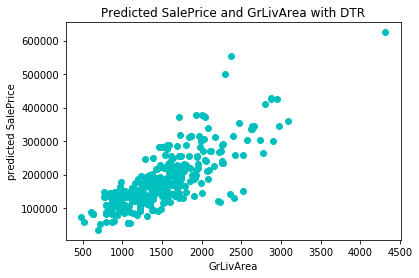

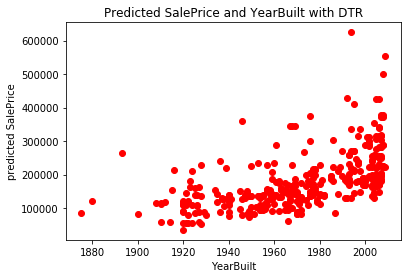

In [40]:
plt.title('Predicted SalePrice and GrLivArea with DTR' )
plt.scatter(X_test.GrLivArea, predict_dtr , c='c')
plt.xlabel('GrLivArea')
plt.ylabel('predicted SalePrice')
plt.show()

plt.title('Predicted SalePrice and YearBuilt with DTR')
plt.scatter(X_test.YearBuilt, predict_dtr , c='r')
plt.xlabel('YearBuilt')
plt.ylabel('predicted SalePrice')
plt.show()

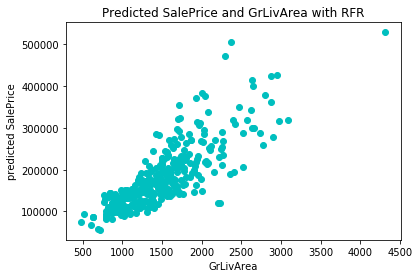

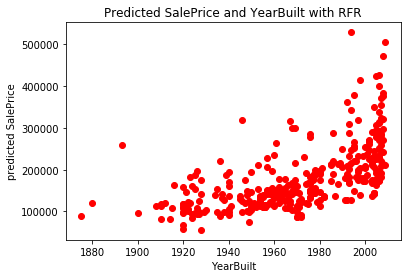

In [41]:
plt.title('Predicted SalePrice and GrLivArea with RFR')
plt.scatter(X_test.GrLivArea, predict_rfr , c='c')
plt.xlabel('GrLivArea')
plt.ylabel('predicted SalePrice')
plt.show()

plt.title('Predicted SalePrice and YearBuilt with RFR')
plt.scatter(X_test.YearBuilt, predict_rfr , c='r')
plt.xlabel('YearBuilt')
plt.ylabel('predicted SalePrice')
plt.show()

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

In [78]:
X = (df.iloc[:, :-1])
y  = df.SalePrice

In [79]:
X_onehot = pd.get_dummies(X)
X_onehot.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [59]:
X_onehot_nomiss = X_onehot.fillna(df.mean())

In [60]:
X = np.array(X_onehot_nomiss)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predict_rfr = rfr.predict(X_test)
print('RandomForestRegressor')
print('mean_squared_error = {}'.format(mean_squared_error(y_test, predict_rfr)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor
mean_squared_error = 1036597932.7424657


In [63]:
print('before=1842414288')
print('after=   1036597932')

before=1842414288
after=   1036597932


他の特徴量　も使った方が改善された。

In [84]:
df1 =  pd.DataFrame(X_test)
df1.columns = X_onehot.columns

In [85]:
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,893.0,20.0,70.000000,8414.0,6.0,8.0,1963.0,2003.0,0.0,663.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1106.0,60.0,98.000000,12256.0,8.0,5.0,1994.0,1995.0,362.0,1032.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,414.0,30.0,56.000000,8960.0,5.0,6.0,1927.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,523.0,50.0,50.000000,5000.0,6.0,7.0,1947.0,1950.0,0.0,399.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1037.0,20.0,89.000000,12898.0,9.0,5.0,2007.0,2008.0,70.0,1022.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,989.0,60.0,70.049958,12046.0,6.0,6.0,1976.0,1976.0,298.0,156.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
361,244.0,160.0,75.000000,10762.0,6.0,6.0,1980.0,1980.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
362,1343.0,60.0,70.049958,9375.0,8.0,5.0,2002.0,2002.0,149.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
363,1058.0,60.0,70.049958,29959.0,7.0,6.0,1994.0,1994.0,0.0,595.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


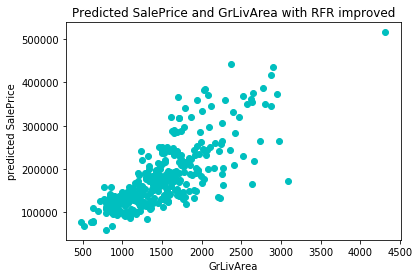

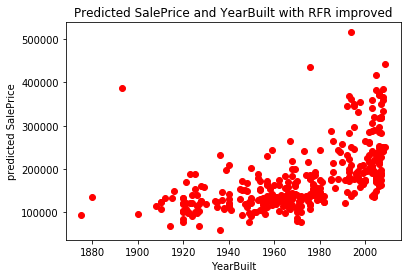

In [86]:
plt.title('Predicted SalePrice and GrLivArea with RFR improved')
plt.scatter(df1.GrLivArea, predict_rfr , c='c')
plt.xlabel('GrLivArea')
plt.ylabel('predicted SalePrice')
plt.show()

plt.title('Predicted SalePrice and YearBuilt with RFR improved')
plt.scatter(df1.YearBuilt, predict_rfr , c='r')
plt.xlabel('YearBuilt')
plt.ylabel('predicted SalePrice')
plt.show()